# Consigna

        Debes graficar y medir el KPI propuesto a continuación, representándolo adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un segundo KPI que consideres relevante para la temática. El KPI propuesto es:

        Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia

In [66]:
import matplotlib.pyplot as plt
font = {'size' : 18}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [67]:
df_kpi=pd.read_csv('Internet_Penetracion_cada100_nuevo.csv')
df_kpi.head(15)

,Unnamed: 0.1,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,0,2022,4,Buenos Aires,"78,94"
1,1,1,2022,4,Capital Federal,"122,73"
2,2,2,2022,4,Catamarca,"65,77"
3,3,3,2022,4,Chaco,"43,62"
4,4,4,2022,4,Chubut,"85,57"
5,5,5,2022,4,Córdoba,"89,03"
6,6,6,2022,4,Corrientes,"51,64"
7,7,7,2022,4,Entre Ríos,"64,01"
8,8,8,2022,4,Formosa,"39,41"
9,9,9,2022,4,Jujuy,"58,46"


In [68]:
df_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0.1                  864 non-null    int64 
 1   Unnamed: 0                    864 non-null    int64 
 2   Año                           864 non-null    int64 
 3   Trimestre                     864 non-null    int64 
 4   Provincia                     864 non-null    object
 5   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(4), object(2)
memory usage: 40.6+ KB


In [70]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_kpi.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_kpi.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [71]:
# KPIs 2%

# Convertir la columna 'Accesos por cada 100 hogares' a string y reemplazar comas por puntos
df_kpi['Accesos por cada 100 hogares'] = df_kpi['Accesos por cada 100 hogares'].astype(str).str.replace(',', '.')

# Convertir la columna a tipo numérico
df_kpi['Accesos por cada 100 hogares'] = pd.to_numeric(df_kpi['Accesos por cada 100 hogares'], errors='coerce')

# Verificar si hay filas con NaN después de la conversión
rows_with_nan = df_kpi[df_kpi['Accesos por cada 100 hogares'].isna()]

# Si hay filas con NaN, muestra esas filas para inspeccionar
if not rows_with_nan.empty:
    print("Filas con NaN en 'Accesos por cada 100 hogares':")
    print(rows_with_nan)

# Combinar las columnas 'Año' y 'Trimestre' para crear una nueva columna 'Año-Trimestre'
df_kpi['Año-Trimestre'] = df_kpi['Año'].astype(str) + '-Q' + df_kpi['Trimestre'].astype(str)

# Convertir la columna 'Año-Trimestre' a formato datetime para extraer el año
df_kpi['Año-Trimestre'] = pd.to_datetime(df_kpi['Año-Trimestre'], format='%Y-Q%m')

# Agregar la columna 'Año' al DataFrame
df_kpi['Año'] = df_kpi['Año-Trimestre'].dt.year

# Muestra el DataFrame resultante
print(df_kpi)

# Calcular el KPI
df_kpi['KPI'] = ((df_kpi['Accesos por cada 100 hogares'].pct_change() * 100).round(2)).fillna(0)

# Agregar columna indicando si el KPI es mayor o igual al 2%
df_kpi['Cumple KPI'] = df_kpi['KPI'] >= 2

# Muestra el DataFrame resultante
print(df_kpi)



     Unnamed: 0.1  Unnamed: 0   Año  Trimestre            Provincia  \
0               0           0  2022          4         Buenos Aires   
1               1           1  2022          4      Capital Federal   
2               2           2  2022          4            Catamarca   
3               3           3  2022          4                Chaco   
4               4           4  2022          4               Chubut   
..            ...         ...   ...        ...                  ...   
859           859         859  2014          1           Santa Cruz   
860           860         860  2014          1             Santa Fe   
861           861         861  2014          1  Santiago Del Estero   
862           862         862  2014          1     Tierra Del Fuego   
863           863         863  2014          1              Tucumán   

     Accesos por cada 100 hogares Año-Trimestre  
0                           78.94    2022-04-01  
1                          122.73    2022-04-01

In [72]:
# KPIs 2%

# Convertir la columna 'Accesos por cada 100 hogares' a string y reemplazar comas por puntos
df_kpi['Accesos por cada 100 hogares'] = df_kpi['Accesos por cada 100 hogares'].astype(str).str.replace(',', '.')

# Convertir la columna a tipo numérico
df_kpi['Accesos por cada 100 hogares'] = pd.to_numeric(df_kpi['Accesos por cada 100 hogares'], errors='coerce')

# Verificar si hay filas con NaN después de la conversión
rows_with_nan = df_kpi[df_kpi['KPI'].isna()]

# Si hay filas con NaN, muestra esas filas para inspeccionar
if not rows_with_nan.empty:
    print("Filas con NaN en 'KPI':")
    print(rows_with_nan)

# Combinar las columnas 'Año' y 'Trimestre' para crear una nueva columna 'Año-Trimestre'
df_kpi['Año-Trimestre'] = df_kpi['Año'].astype(str) + '-Q' + df_kpi['Trimestre'].astype(str)

# Convertir la columna 'Año-Trimestre' a formato datetime para extraer el año
df_kpi['Año-Trimestre'] = pd.to_datetime(df_kpi['Año-Trimestre'], format='%Y-Q%m')

# Agregar la columna 'Año' al DataFrame
df_kpi['Año'] = df_kpi['Año-Trimestre'].dt.year

# Agregar la columna 'Provincia' al DataFrame

# Agregar la columna 'Provincia' al DataFrame resultante
df_kpi = df_kpi[['Provincia', 'Año', 'Trimestre', 'KPI', 'Cumple KPI']]

# Muestra el DataFrame resultante
print(df_kpi)

# Calcular el KPI
df_kpi['KPI'] = ((df_kpi['KPI'].pct_change() * 100).round(2)).fillna(0)

# Agregar columna indicando si el KPI es mayor o igual al 2%
df_kpi['Cumple KPI'] = df_kpi['KPI'] >= 2

# Muestra el DataFrame resultante
print(df_kpi)


               Provincia   Año  Trimestre     KPI  Cumple KPI
0           Buenos Aires  2022          4    0.00       False
1        Capital Federal  2022          4   55.47        True
2              Catamarca  2022          4  -46.41       False
3                  Chaco  2022          4  -33.68       False
4                 Chubut  2022          4   96.17        True
..                   ...   ...        ...     ...         ...
859           Santa Cruz  2014          1  209.52        True
860             Santa Fe  2014          1   65.34        True
861  Santiago Del Estero  2014          1  -65.91       False
862     Tierra Del Fuego  2014          1  292.21        True
863              Tucumán  2014          1  -47.76       False

[864 rows x 5 columns]
               Provincia   Año  Trimestre     KPI  Cumple KPI
0           Buenos Aires  2022          4    0.00       False
1        Capital Federal  2022          4     inf        True
2              Catamarca  2022          4 -183

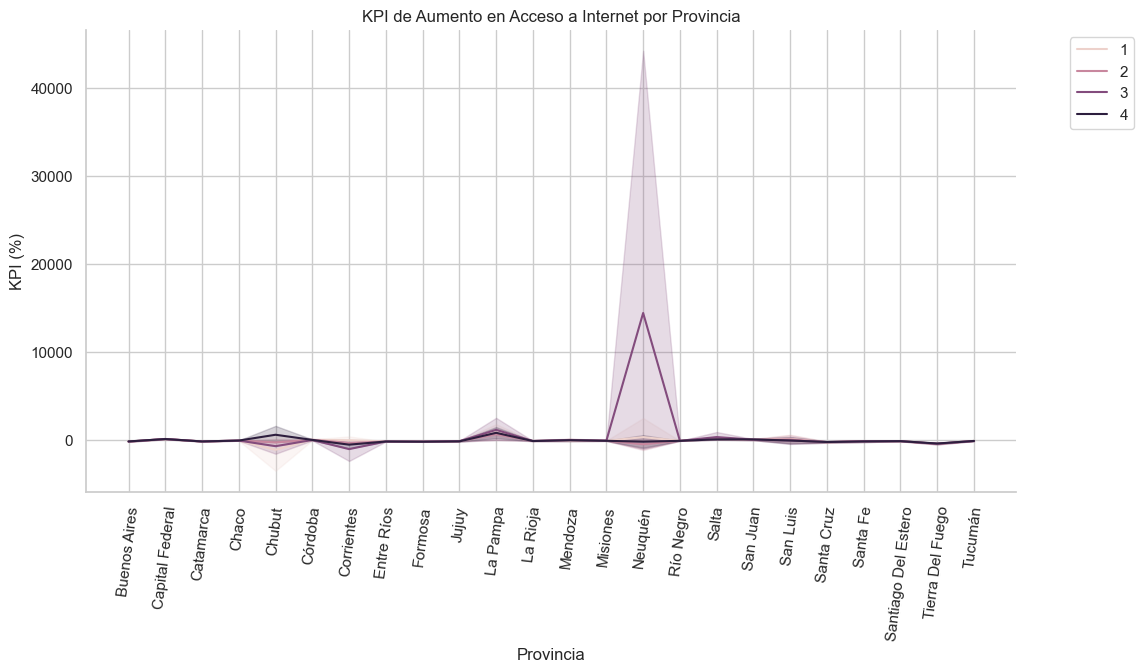

In [78]:
# Grafico el KPI

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar el KPI por provincia y trimestre
sns.lineplot(x='Provincia', y='KPI', hue='Trimestre', data=df_kpi)

# Ajustes adicionales para mejorar la visualización
plt.title('KPI de Aumento en Acceso a Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.xticks(rotation=83)

# Ajustar la leyenda para que no se superponga con el gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar las líneas punteadas en el gráfico
sns.despine()

# Mostrar el gráfico
plt.show()



**Propuesta de KPI**

Para establecer un KPI con un objetivo de mejora para el futuro, podríamos considerar un objetivo específico de incremento en la velocidad de bajada. Supongamos que deseamos aumentar la velocidad de bajada en un 5% para el próximo trimestre en comparación con el trimestre actual. El KPI podría calcularse de la siguiente manera:

$Objetivo_KPI = ((Vel_media_futuro - Vel_media_actual)/Vel_media_actual)$ * 100


In [12]:
df_velocidad=pd.read_csv('historico_velocidad_internet_media_nuevo.csv')

# Ordenar el DataFrame por año, trimestre y provincia para asegurar el orden correcto
# df_velocidad = df_velocidad.sort_values(by=['Año', 'Trimestre', 'Provincia'])

# Calcular la velocidad media del próximo trimestre
#df_velocidad['Velocidad_Media_futuro'] = df_velocidad.groupby('Provincia')['Velocidad_Media'].shift(-1)

# Calcular el KPI con un objetivo del 5%
df_velocidad['Objetivo_KPI'] = ((df_velocidad['Velocidad_Media'] * 1.05) - df_velocidad['Trimestre']) / df_velocidad['Trimestre'] * 100

# Eliminar la columna de velocidad media del próximo trimestre si no se va a utilizar
# df_velocidad = df_velocidad.drop(columns=['Velocidad_Media_futuro'])

# Mostrar el DataFrame con el nuevo KPI
df_velocidad.head()


,Unnamed: 0,Año,Trimestre,Provincia,Velocidad_Media,Objetivo_KPI
0,0,2022,4,Buenos Aires,111.000,2813.75000
1,1,2022,4,Capital Federal,18.286,380.00750
2,2,2022,4,Catamarca,8.333,118.74125
3,3,2022,4,Chaco,10.402,173.05250
4,4,2022,4,Chubut,1.592,-58.21000


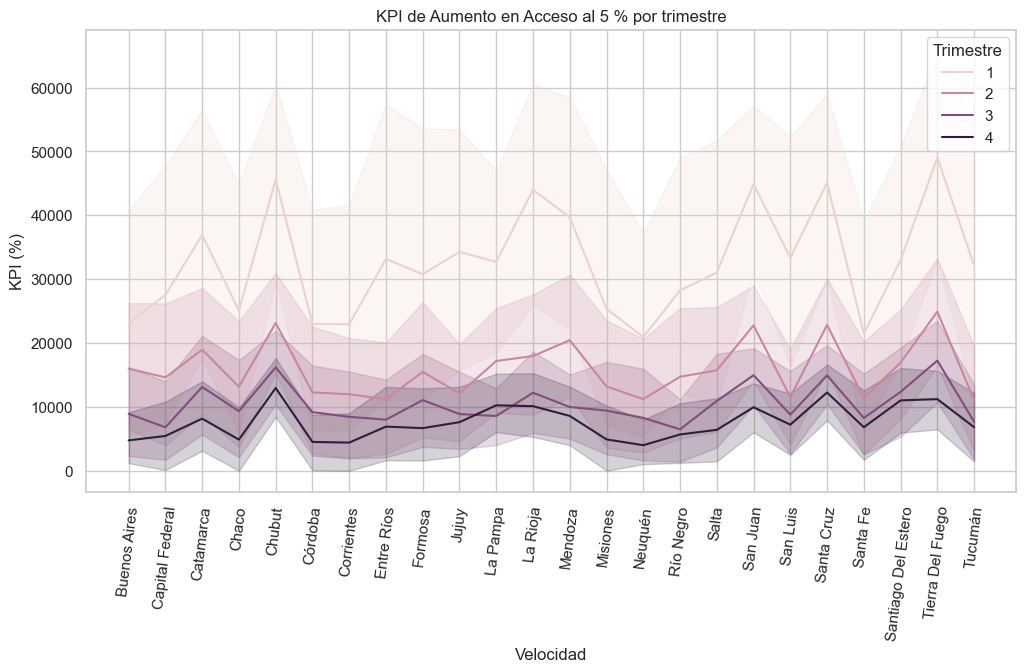

In [13]:
# Grafico mi propuesta de KPI de aumento de velocidad del 5% 

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar el KPI por provincia y año-trimestre
sns.lineplot(x='Provincia', y='Objetivo_KPI',  hue='Trimestre' , data=df_velocidad) # hue='Año-Trimestre', )

# Ajustes adicionales para mejorar la visualización
plt.title('KPI de Aumento en Acceso al 5 % por trimestre')
plt.xlabel('Velocidad')
plt.ylabel('KPI (%)')
plt.xticks(rotation=83)


# Mostrar el gráfico

plt.show()


**Conclusiones**

1. **Análisis de Velocidad Media de Internet:**
   - Analisis de la velocidad media de Internet en diferentes provincias durante varios años y trimestres.
   - Se identificaron variaciones significativas en la velocidad media entre provincias y trimestres.

2. **Visualización y Análisis Gráfico:**
   - Utilización gráficos, como el boxplot, para visualizar la distribución de la velocidad media por provincia y trimestre.
   - Se identificaron cuartiles, medianas y valores atípicos, lo que proporcionó información detallada sobre la variabilidad de la velocidad en cada región y período.

3. **Objetivo de Mejora y KPI:**
   - Propuesta de un objetivo de mejora del 5% en la velocidad media de Internet.
   - Nuevo KPI (Objetivo_KPI) para evaluar el progreso hacia ese objetivo.

4. **Análisis de Objetivo_KPI:**
   - Comparación la velocidad media actual con el objetivo del 5% para evaluar el rendimiento de cada provincia en cada trimestre.
   - Se identificaron provincias y trimestres que superaron o no alcanzaron el objetivo del 5%.

5. **Ajustes y Consideraciones Adicionales:**
   - Se realizaron ajustes en la presentación de datos y se consideró la conversión de variables a categóricas para facilitar el análisis y la visualización.

6. **Conclusiones Específicas:**
   - Se proporcionaron observaciones específicas sobre provincias con buen rendimiento, aquellas que necesitan mejoras y patrones identificados en el análisis gráfico.

